In [7]:
using DrWatson
@quickactivate projectdir()

using StatsPlots
using StatsBase
using NewickTree
using Muon

In [10]:
ddir = datadir("exp_pro", "BB669")


"/Users/bend/projects/Doran_etal_2022/data/exp_pro/BB669"

In [38]:
biobank = readh5mu(projectdir("data/exp_pro/BB669/BB669.h5mu"))

MuData object 669 ✕ 21485
└ metabolites_foldchange
  AnnData object 669 ✕ 50
└ metabolites_millimolar
  AnnData object 669 ✕ 10
└ UPorder_oggs
  AnnData object 669 ✕ 10177
└ oggs
  AnnData object 669 ✕ 11248

In [39]:
specieslabels = [
    "Bacteroides uniformis",
    "Phocaeicola vulgatus",
    "Bacteroides thetaiotaomicron",
    "[Ruminococcus] gnavus",
    "Bifidobacterium breve",
    "[Eubacterium] rectale",
    "Dorea formicigenerans",
    "Coprococcus comes",
    "Blautia luti & Blautia wexlerae",
    "Anaerostipes hadrus",
]
shapes = permutedims([:circle, :rect, :star5, :diamond, :hexagon, :ltriangle, :pentagon, :utriangle, :dtriangle, :rtriangle, :star4])
speciescolors = wload(joinpath(ddir, "subsettreecolors.jld2"))["colors"]
speciescolors_ordered = permutedims(speciescolors[replace(indexin(sort(unique(trnYdf.species)), specieslabels), nothing=>9)])

UndefVarError: UndefVarError: `trnYdf` not defined

In [51]:
tree = readnw(readline(projectdir("_research/metabolite_knn_model/biobank-only_fold4_supporttree.nw")))

((((((((((MSK.20.28:272.8403,(MSK.20.27:26.76408,MSK.20.41:26.76408)1.0:246.0762)1.0:506.0757,(((DFI.5.25:522.879,(MSK.10.8:443.6219,DFI.4.142:443.6219)0.78:79.25705)0.6950000000000001:44.08752,MSK.9.7:566.9665)0.6933333333333334:76.05832,(MSK.6.33:593.9606,((((MSK.19.88:84.93044,MSK.19.40:84.93044)1.0:236.7076,(((MSK.19.26:60.54995,MSK.19.29:60.54995)0.98:76.31534,((MSK.19.85:12.16763,MSK.19.35:12.16763)1.0:81.87014,MSK.19.93:94.03777)0.97:42.82752)1.0:111.5701,(((MSK.19.95:15.88843,MSK.19.45:15.88843)1.0:83.94032,(MSK.19.32:20.11235,(((MSK.19.16:5.457711,MSK.19.20:5.457711)0.48:2.175853,MSK.19.21:7.633565)0.775:2.506914,MSK.19.19:10.14048)0.9966666666666667:9.971875)1.0:79.7164)0.9283333333333333:40.10553,MSK.19.86:139.9343)1.0:108.5011)0.9983333333333333:73.2026)1.0:87.23438,(((MSK.16.26:10.08777,(((MSK.16.83:4.851526,MSK.16.47:4.851526)0.61:1.757199,MSK.16.90:6.608725)0.73:2.768699,MSK.16.84:9.377424)0.7833333333333333:0.7103452)0.9525:8.537883,MSK.16.10:18.62565)1.0:310.9928,(((MS

In [52]:
species_coldict = Dict(k=>v for (k,v) in zip(specieslabels, speciescolors))

Dict{String, RGB{Float64}} with 10 entries:
  "[Eubacterium] rectale"           => RGB{Float64}(0.835,0.243,0.31)
  "[Ruminococcus] gnavus"           => RGB{Float64}(0.196,0.533,0.741)
  "Coprococcus comes"               => RGB{Float64}(0.992,0.682,0.38)
  "Phocaeicola vulgatus"            => RGB{Float64}(0.62,0.004,0.259)
  "Dorea formicigenerans"           => RGB{Float64}(0.902,0.961,0.596)
  "Bacteroides uniformis"           => RGB{Float64}(0.996,0.878,0.545)
  "Blautia luti & Blautia wexlerae" => RGB{Float64}(0.369,0.31,0.635)
  "Anaerostipes hadrus"             => RGB{Float64}(0.4,0.761,0.647)
  "Bacteroides thetaiotaomicron"    => RGB{Float64}(0.671,0.867,0.643)
  "Bifidobacterium breve"           => RGB{Float64}(0.957,0.427,0.263)

In [53]:
branchcolors = map(prewalk(tree)) do node
    mskids = name.(getleaves(node))
    species_id = mode(biobank.obs.species[indexin(mskids, biobank.obs.ID)])
    species_label = filter(x->occursin(species_id, x), keys(species_coldict)) |> first
    species_coldict[species_label]
end |> vec |> x->x[2:end] |> permutedims

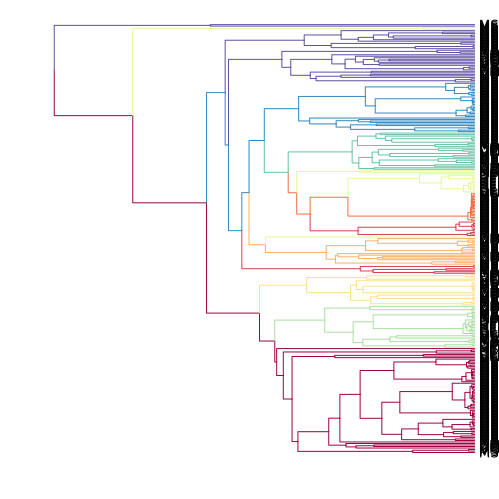

In [56]:
plot(tree, 
    linecolor=branchcolors,
    size=(500,500),
)

In [55]:
pdir = plotsdir("foldtree_for_metabolism_prediction") |> mkpath

"/Users/bend/projects/Doran_etal_2022/plots/foldtree_for_metabolism_prediction"

In [57]:
savefig(joinpath(pdir, "Fold4tree.pdf"))

"/Users/bend/projects/Doran_etal_2022/plots/foldtree_for_metabolism_prediction/Fold4tree.pdf"